## q-1-3-3
#### Analyse  and  report  the  behaviour  of  the  coefficients(for  example:  sign  of  coefficients,  value of coefficients etc.)  and support it with appropriate plots as necessary

In [13]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn as sk
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("input_data/AdmissionDataset/data.csv")
X = df.drop(['Serial No.','Chance of Admit '],axis=1)
Y = df['Chance of Admit ']
col_names = [i for i in X]
X = pd.DataFrame(preprocessing.scale(X), columns = col_names)

/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
sys_pred = regressor.predict(X_test) 
inbuilt_coeff = []
inbuilt_coeff.append(regressor.intercept_)
inbuilt_coeff.append(list(regressor.coef_))
# print(regressor.coef_)
# print(regressor.intercept_)
r2_score(Y_test,sys_pred)

0.8618975021105437

In [17]:
X_train1 = X_train.reset_index(drop=True)
Y_train1 = Y_train.reset_index(drop=True)

In [18]:
ones = pd.DataFrame(1,index=np.arange(X_train.shape[0]),columns=["ones"])
X_train1 = pd.concat([ones, X_train1],axis=1)
X_train1 = np.array(X_train1)
Y_train1 = np.array(Y_train1).reshape(X_train1.shape[0],1)

In [19]:
theta = np.zeros([1,8])
alpha = 0.01
iterations = 1000

In [20]:
def gradientDescent(X,Y,theta,it,alpha):
    for i in range(it):
        theta = theta - (alpha/len(X)) * np.sum(X * (np.matmul(X, theta.T) - Y), axis=0)
    return theta

g = gradientDescent(X_train1,Y_train1,theta,iterations,alpha)
theta_list = g[0]

In [21]:
def predict(X_test):
    Y_pred=[]
    for index,row in X_test.iterrows():
        row=list(row)
        y1=0
        for i in range(1,8):
            y1=y1+theta_list[i]*row[i-1]
        y1=y1+theta_list[0]
        Y_pred.append(y1)
    return Y_pred
pred = predict(X_train)

In [22]:
# print r2_score(list(Y_test),pred)
print theta_list


[0.72003604 0.02484092 0.01986432 0.00842028 0.00453525 0.01501847
 0.05884598 0.01379512]


###### Observation: Higher the coefficient, more that feature dominates. In this case, CGPA dominates the most.
###### Negative sign indicates that higher the coefficient, less it dominates.

###### residual plots

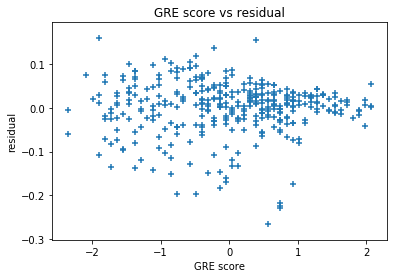

In [23]:
y_axis = Y_train - pred
x_axis = X_train['GRE Score']

figure()
scatter(x_axis,y_axis,marker='+')

xlabel('GRE score')
ylabel('residual')
title('GRE score vs residual')
show()

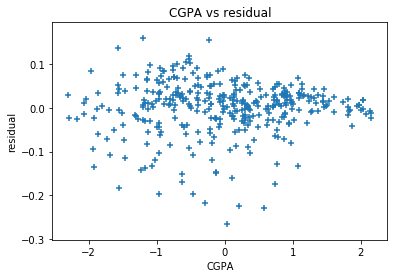

In [24]:
y_axis = Y_train - pred
x_axis = X_train['CGPA']

figure()
scatter(x_axis,y_axis,marker='+')

xlabel('CGPA')
ylabel('residual')
title('CGPA vs residual')
show()